# 1. Importing libraries and data

In [1]:
# Importing libraries

# Data Wrangling and Viz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preprocessing
from sklearn.preprocessing import scale

In [2]:
# Creating a Pipeline fot import Data
def importdata(filename):
    path = "C:\\Users\\Usuario\\Documents\\Ciência de Dados\\Datasets\\"
    return pd.read_csv(path + filename)

In [3]:
# Importing data
df = importdata('yield_df.csv')

# 2. Checking data and EDA

## 2.1. Checking data

In [4]:
# Checking Dataset Format and columns
print(30*'-', 'Shape', 30*'-')
print(df.shape)
print(30*'-', 'Columns', 30*'-')
print(df.columns)
print(30*'-', 'Short description', 30*'-')
print(df.describe())

------------------------------ Shape ------------------------------
(28242, 8)
------------------------------ Columns ------------------------------
Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')
------------------------------ Short description ------------------------------
         Unnamed: 0          Year    hg/ha_yield  \
count  28242.000000  28242.000000   28242.000000   
mean   14120.500000   2001.544296   77053.332094   
std     8152.907488      7.051905   84956.612897   
min        0.000000   1990.000000      50.000000   
25%     7060.250000   1995.000000   19919.250000   
50%    14120.500000   2001.000000   38295.000000   
75%    21180.750000   2008.000000  104676.750000   
max    28241.000000   2013.000000  501412.000000   

       average_rain_fall_mm_per_year  pesticides_tonnes      avg_temp  
count                    28242.00000       28242.000000  28242.000000  
me

In [5]:
# Renaming 'Unnamed: 0' to 'Index'
df.columns = ['Index', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [7]:
df = df.set_index('Index')

In [8]:
# Visualizing df
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Index,,,,,,,
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [9]:
# Checking nulls
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [10]:
# Checking duplicates
df.duplicated().sum()

np.int64(2310)

In [11]:
# Removing duplicates
df.drop_duplicates(inplace=True)
df.shape

(25932, 7)

In [12]:
# Converting col 'Year' to datetime
df['Year'] = pd.to_datetime(df.Year, format='%Y')

In [13]:
# Checking how many differente attributes has on 'Item' and 'Area'
item = df['Item'].nunique()
area = df['Area'].nunique()

print(f'Item: {item}, Area: {area}')

Item: 10, Area: 101


- Original shape: (28242, 8)
- Original columns: ['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
    - Need to set 'Unnamed: 0' as index
- The dataframe has 2310 duplicated data, so I've used dorp_duplicates() to remove them
- I've transformed column 'Year' to datetime to distinguish from numerical columns
- The columns 'Item' and 'Area' have respectively 10 and 101 unique values, this will be useful when I will need to use Label or One Hot Encoding.

## 2.2. EDA

In [14]:
# Describing data
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001-07-22 20:59:55.002313984,76978.132925,1146.836688,34782.573241,20.422251
min,1990-01-01 00:00:00,50.000000,51.000000,0.040000,1.300000
25%,1995-01-01 00:00:00,19996.000000,593.000000,1597.000000,16.580000
50%,2001-01-01 00:00:00,39530.000000,1083.000000,15373.000000,21.420000
75%,2008-01-01 00:00:00,104168.000000,1668.000000,45620.000000,26.060000
max,2013-01-01 00:00:00,501412.000000,3240.000000,367778.000000,30.650000
std,NaN,84647.605552,717.391098,57228.568244,6.439402


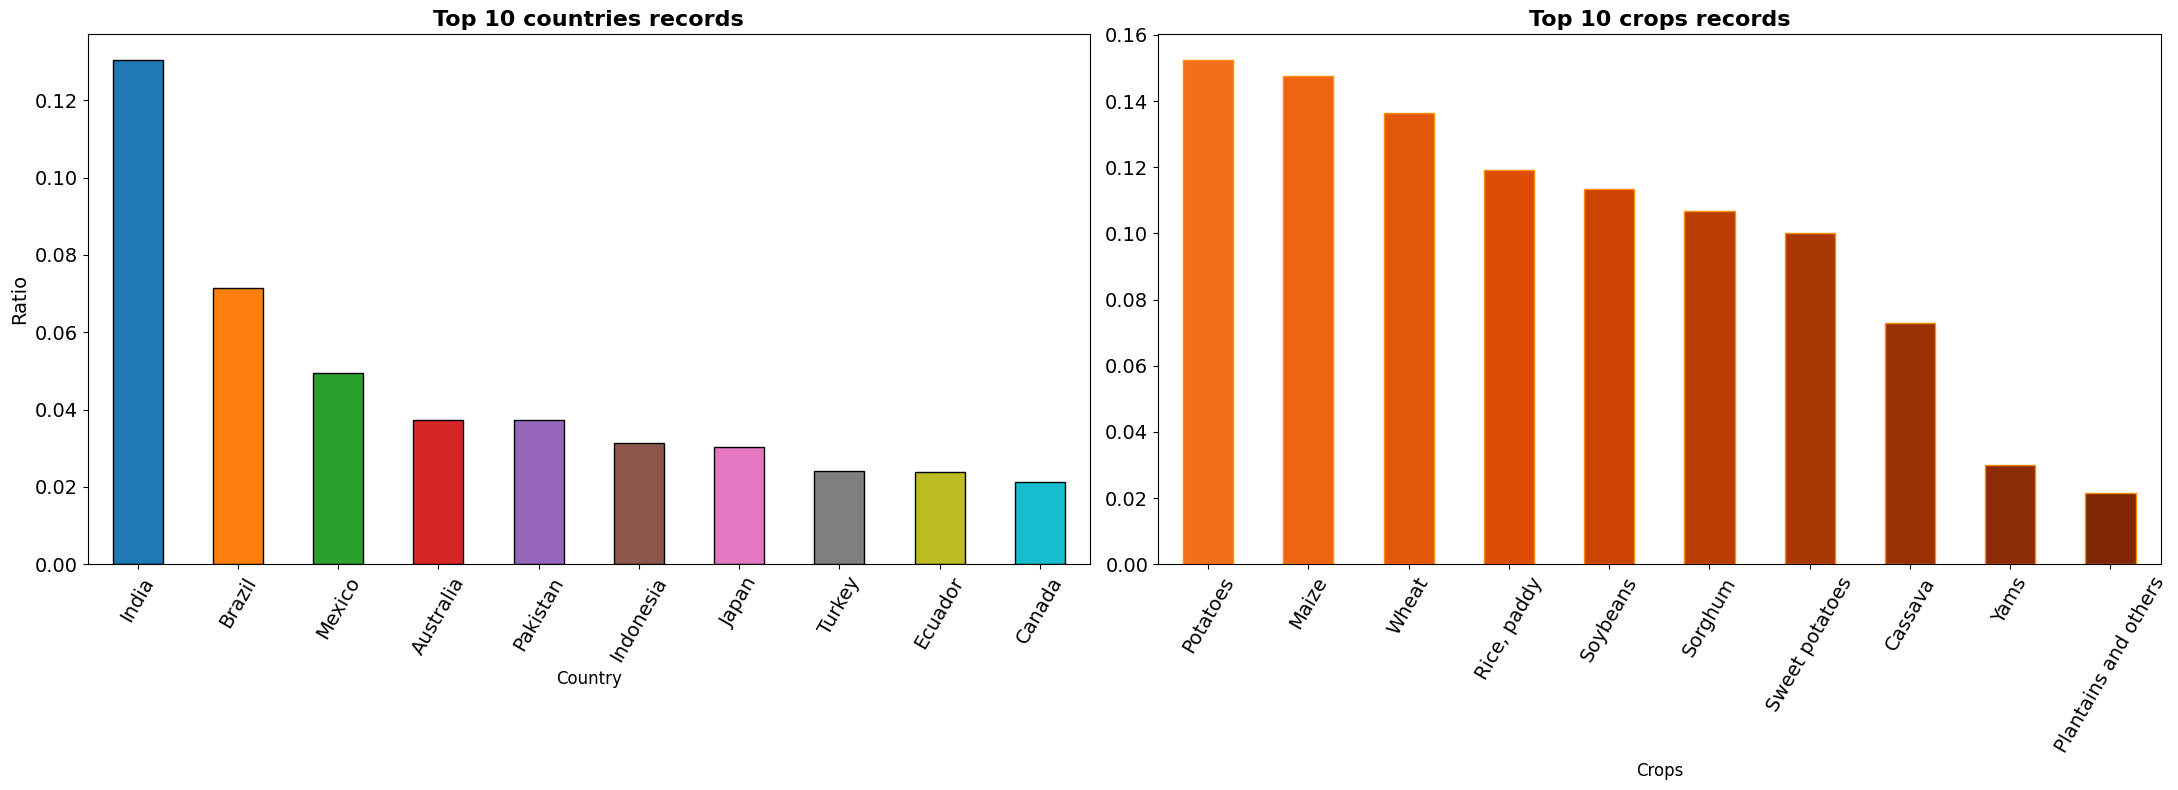

In [40]:
# Creating a Figure to analyze data
plt.figure(figsize=(22,8))

# Checking countries that most appear
plt.subplot(1,2,1)
colors1 = plt.cm.tab10(np.linspace(0,1,10)) 
df['Area'].value_counts(normalize=True).head(10).plot(kind='bar', color=colors1, edgecolor='black')
plt.title('Top 10 countries records', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Ratio', fontsize=14)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
colors2 = plt.cm.Oranges(np.linspace(0.6, 1, 10))
df['Item'].value_counts(normalize=True).plot(kind='bar', color=colors2, edgecolor='darkorange')
plt.title('Top 10 crops records', fontsize=16, fontweight='bold')
plt.xlabel('Crops', fontsize=12)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

In [16]:
# Analyzing report
print('-' * 30, 'Analysis report', '-' * 30)
print('=' * 21, 'Ratio of top 10 countries recorded', '=' * 21)
print(df['Area'].value_counts(normalize=True).head(10))
print()
print('=' * 28, 'Ratio of crops recorded', '=' * 28)
print(df['Item'].value_counts(normalize=True))

------------------------------ Analysis report ------------------------------
===================== Ratio of top 10 countries recorded =====================
Area
India        0.130495
Brazil       0.071495
Mexico       0.049360
Australia    0.037251
Pakistan     0.037251
Indonesia    0.031467
Japan        0.030233
Turkey       0.024101
Ecuador      0.023947
Canada       0.021286
Name: proportion, dtype: float64

============================ Ratio of crops recorded ============================
Item
Potatoes                0.152553
Maize                   0.147463
Wheat                   0.136472
Rice, paddy             0.119196
Soybeans                0.113373
Sorghum                 0.106818
Sweet potatoes          0.099992
Cassava                 0.072844
Yams                    0.029847
Plantains and others    0.021441
Name: proportion, dtype: float64


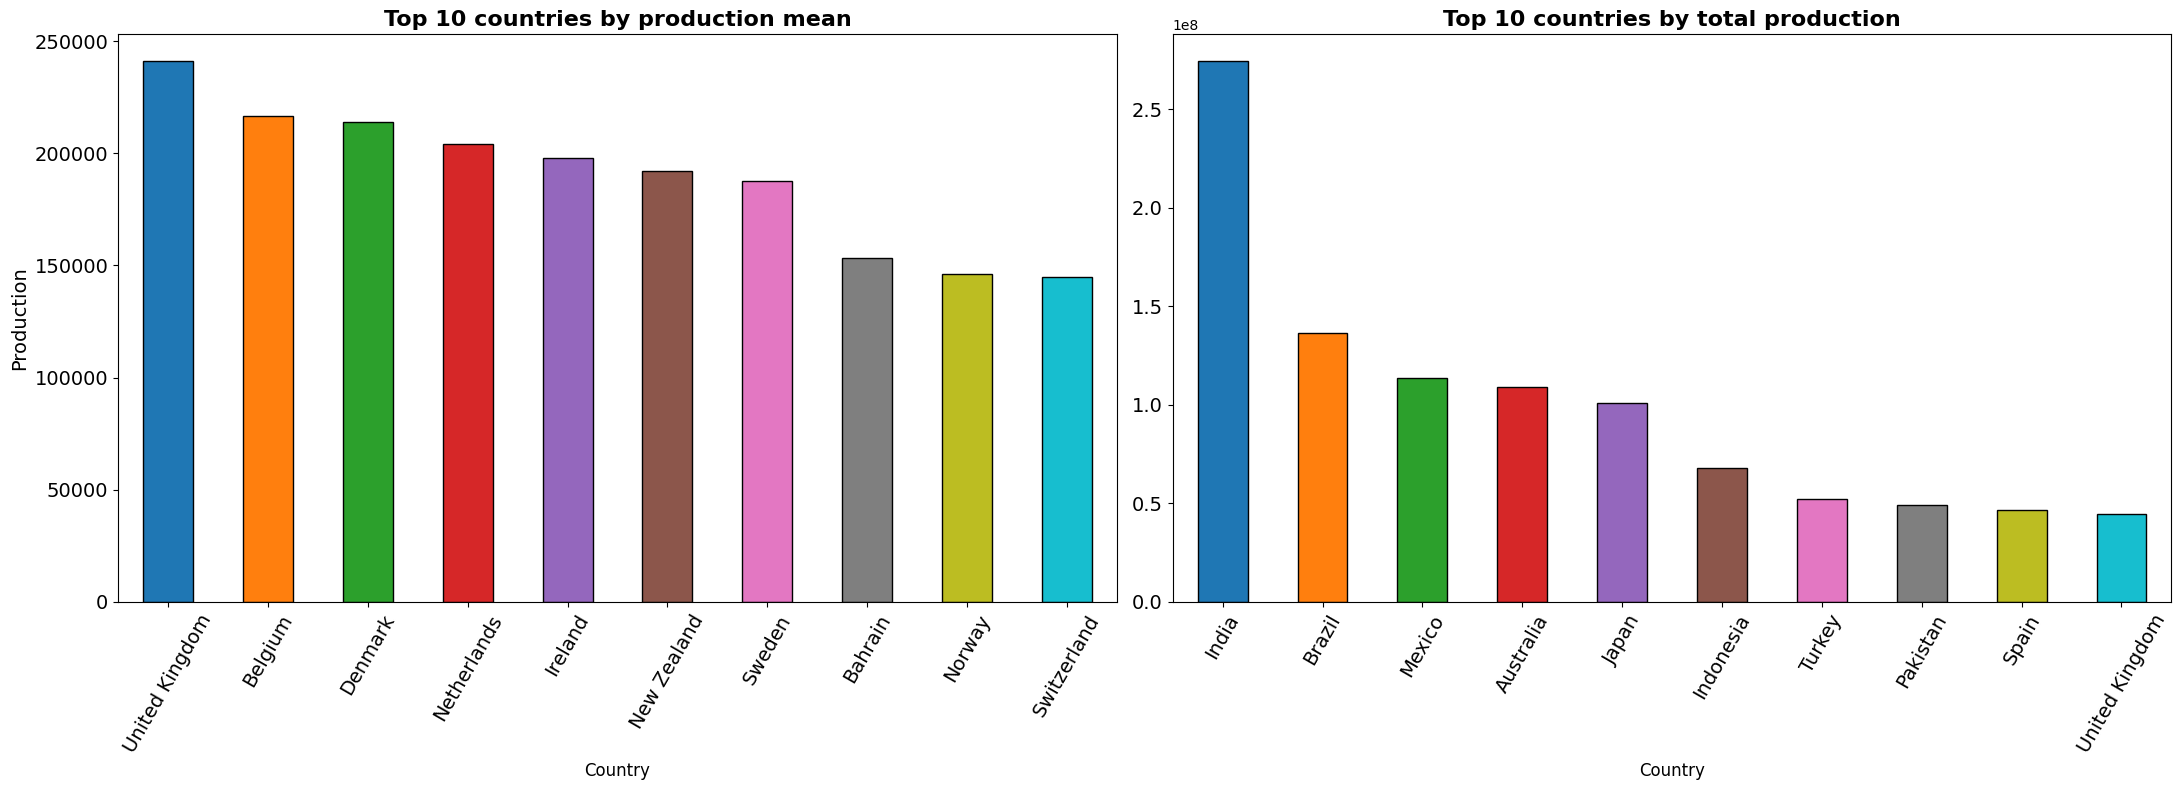

In [39]:
# Calculating Top 10 countries by production mean
countries_mean = df.groupby('Area')['hg/ha_yield'].mean()
countries_mean = countries_mean.sort_values(ascending=False)
top10_countries_mean = countries_mean.head(10)

# Calculating Top 10 countries by total production
countries = df.groupby('Area')['hg/ha_yield'].sum()
countries = countries.sort_values(ascending=False)
top10_countries = countries.head(10)

# Creating a Figure to analyze data
plt.figure(figsize=(22,8))

# Checking Top 10 countries by production mean
plt.subplot(1,2,1)
colors3 = plt.cm.tab10(np.linspace(0,1,len(top10_countries_mean)))
top10_countries_mean.plot(kind='bar', color=colors3, edgecolor='black')
plt.title('Top 10 countries by production mean', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Production', fontsize=14)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)

# Checking Top 10 countries by total production
plt.subplot(1,2,2)
top10_countries.plot(kind='bar', color=colors3, edgecolor='black')
plt.title('Top 10 countries by total production', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

In [18]:
# Calculating global mean and the proportion for 'Area' and 'Item'
global_mean = df['hg/ha_yield'].mean()
countries_ratio_mean = df.groupby('Area')['hg/ha_yield'].mean() / global_mean * 100
countries_ratio_mean = countries_ratio_mean.sort_values(ascending=False).head(10)
total_production = df['hg/ha_yield'].sum()
countries_ratio = df.groupby('Area')['hg/ha_yield'].sum() / total_production * 100
countries_ratio = countries_ratio.sort_values(ascending=False).head(10)

In [19]:
# Report with mean as metric
print('-' * 30, 'Analysis report', '-' * 30)
print('=' * 25, 'Most Efficient Countries', '=' * 25)
print(countries_ratio_mean)
print()
print('=' * 25, 'Most Productive Countries', '=' * 25)
print(countries_ratio)

------------------------------ Analysis report ------------------------------
========================= Most Efficient Countries =========================
Area
United Kingdom    313.019385
Belgium           281.207732
Denmark           278.043922
Netherlands       265.206748
Ireland           257.103788
New Zealand       249.332919
Sweden            243.452904
Bahrain           199.066340
Norway            189.814069
Switzerland       188.313586
Name: hg/ha_yield, dtype: float64

========================= Most Productive Countries =========================
Area
India             13.737099
Brazil             6.830004
Mexico             5.695774
Australia          5.465947
Japan              5.055821
Indonesia          3.409850
Turkey             2.618176
Pakistan           2.467941
Spain              2.343133
United Kingdom     2.221023
Name: hg/ha_yield, dtype: float64


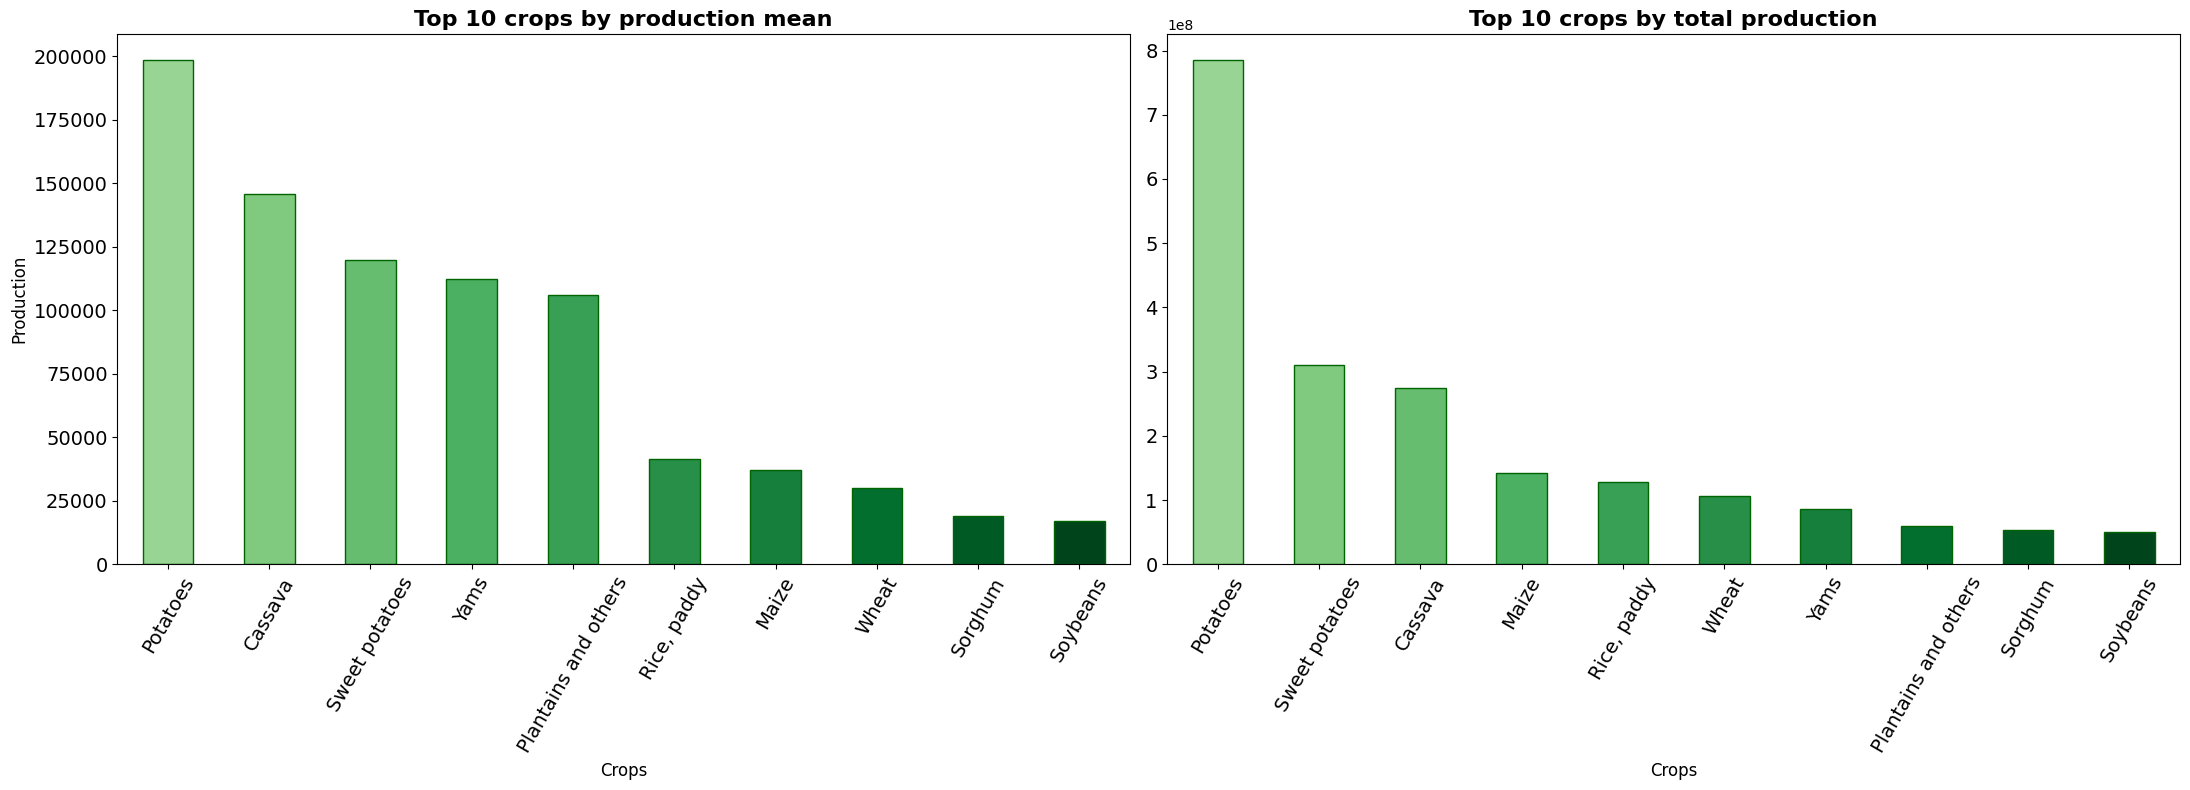

In [38]:
# Creating a Figure to analyze data
plt.figure(figsize=(22,8))

# Checking Top 10 crop by production mean
plt.subplot(1,2,1)
colors4 = plt.cm.Greens(np.linspace(0.4, 1, 10))
df.groupby('Item')['hg/ha_yield'].mean().sort_values(ascending=False).plot(kind='bar', color=colors4,
                                                                           edgecolor='darkgreen')
plt.title('Top 10 crops by production mean', fontsize=16, fontweight='bold')
plt.xlabel('Crops', fontsize=12)
plt.ylabel('Production', fontsize=12)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)

# Checking Top 10 crop by total production
plt.subplot(1,2,2)
df.groupby('Item')['hg/ha_yield'].sum().sort_values(ascending=False).plot(kind='bar', color=colors4,
                                                                           edgecolor='darkgreen')
plt.title('Top 10 crops by total production', fontsize=16, fontweight='bold')
plt.xlabel('Crops', fontsize=12)
plt.xticks(rotation=60, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

In [21]:
# Calculating total production and the proportion for 'Area' and 'Item'
crops_ratio_mean = df.groupby('Item')['hg/ha_yield'].mean() / global_mean * 100
crops_ratio_mean = crops_ratio_mean.sort_values(ascending=False)
crops_ratio = df.groupby('Item')['hg/ha_yield'].sum() / total_production * 100
crops_ratio = crops_ratio.sort_values(ascending=False)

In [22]:
# Report with sum as metric
print('-' * 30, 'Analysis report', '-' * 30)
print('=' * 25, 'Most Efficient Crops', '=' * 25)
print(crops_ratio_mean)
print()
print('=' * 25, 'Most Produced Crops', '=' * 25)
print(crops_ratio)

------------------------------ Analysis report ------------------------------
========================= Most Efficient Crops =========================
Item
Potatoes                258.080727
Cassava                 189.209178
Sweet potatoes          155.442216
Yams                    145.633089
Plantains and others    137.755121
Rice, paddy              53.646441
Maize                    48.246585
Wheat                    39.135375
Sorghum                  24.811949
Soybeans                 22.074048
Name: hg/ha_yield, dtype: float64

========================= Most Produced Crops =========================
Item
Potatoes                39.370945
Sweet potatoes          15.543023
Cassava                 13.782822
Maize                    7.114567
Rice, paddy              6.394460
Wheat                    5.340895
Yams                     4.346753
Plantains and others     2.953565
Sorghum                  2.650359
Soybeans                 2.502611
Name: hg/ha_yield, dtype: float64


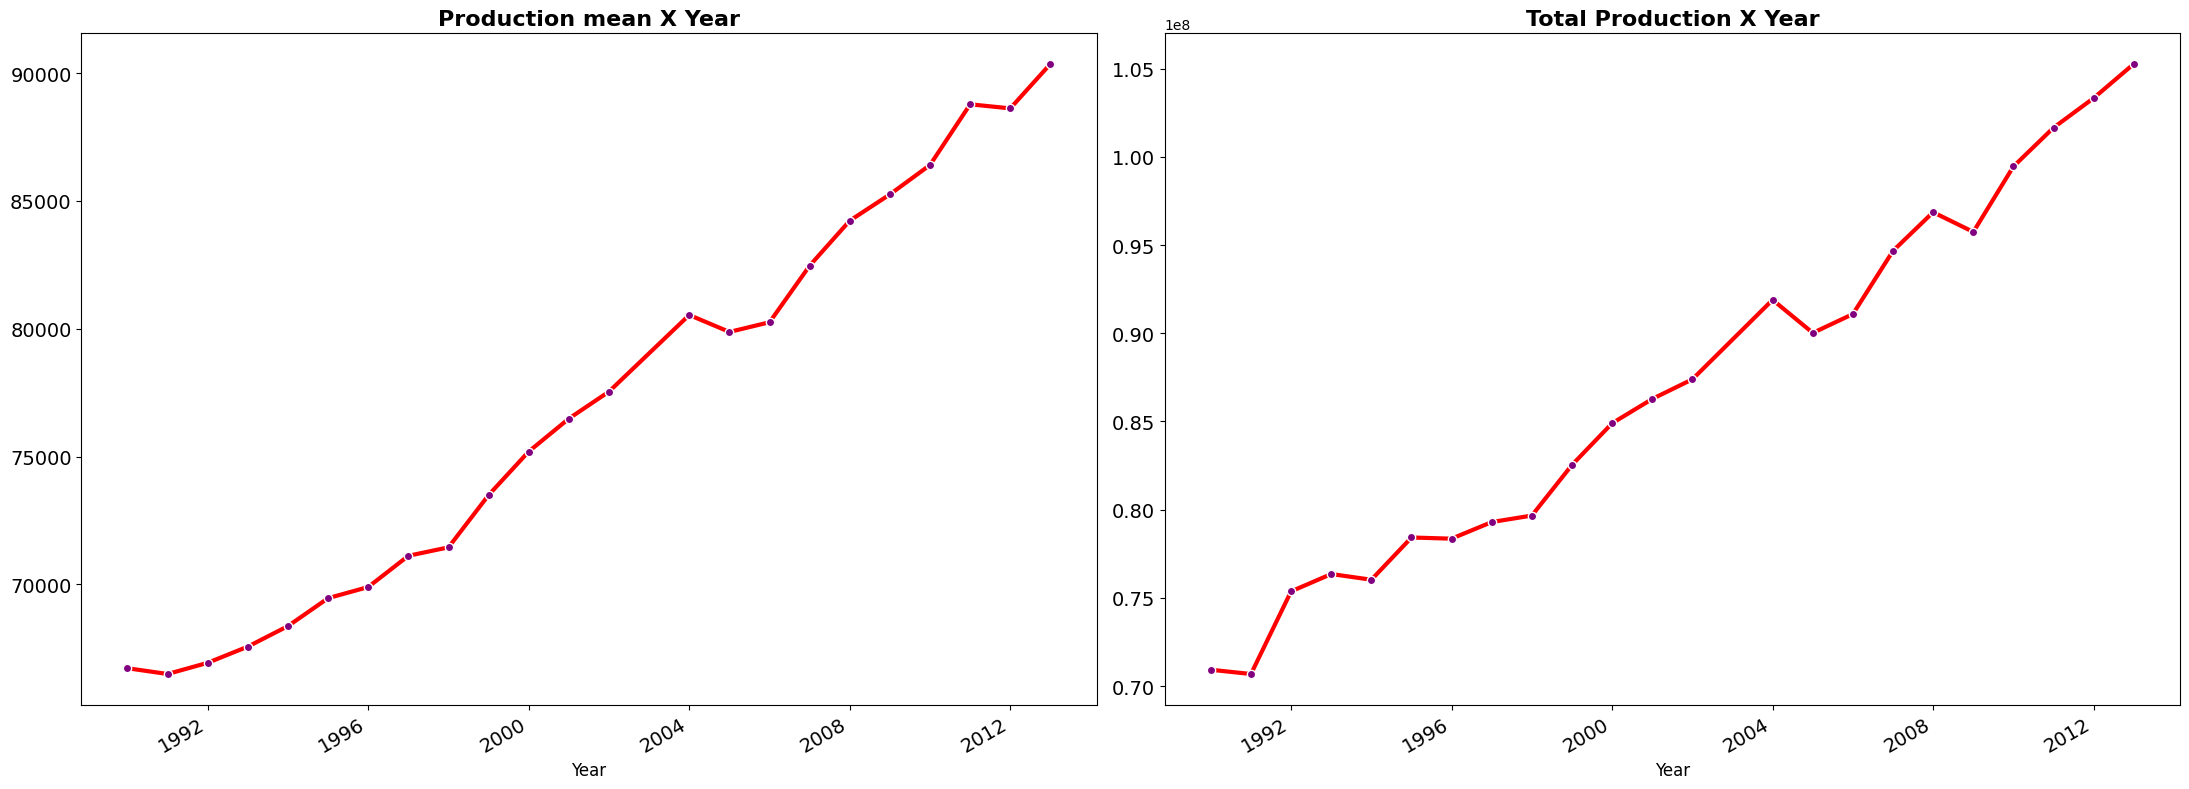

In [37]:
# Creating a Figure to analyze data
plt.figure(figsize=(22,8))

#Checking production mean by year
plt.subplot(1,2,1)
df.groupby('Year')['hg/ha_yield'].mean().plot(kind='line', color='red', linewidth=3, marker ='o',
            markersize=6, markerfacecolor='purple', markeredgecolor='white', markeredgewidth=1)
plt.title('Production mean X Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Checking total production by year
plt.subplot(1,2,2)
df.groupby('Year')['hg/ha_yield'].sum().plot(kind='line', color='red', linewidth=3, marker ='o',
            markersize=6, markerfacecolor='purple', markeredgecolor='white', markeredgewidth=1)
plt.title('Total Production X Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

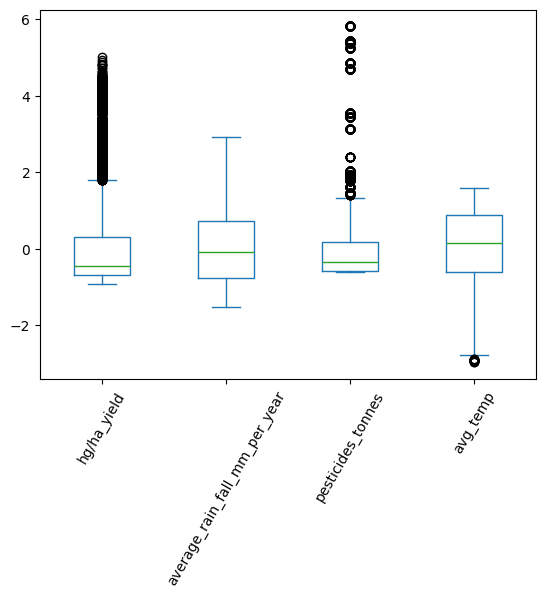

In [24]:
# Searching for outliers
df_numerical = df.drop(columns=['Area', 'Item','Year'])
df_num_scaled = df_numerical.apply(scale)
df_num_scaled.plot.box() 
plt.xticks(rotation=60)
plt.show()

In [25]:
# Checking how many outlier each feature has using Z-Score
z = np.abs((df_num_scaled - df_num_scaled.mean()) / df_num_scaled.std())
outlier_counts = (z > 3).sum()
print(outlier_counts)

hg/ha_yield                      561
average_rain_fall_mm_per_year      0
pesticides_tonnes                801
avg_temp                           0
dtype: int64


In [26]:
# Calculating the outliers ratio
outliers = z > 3
outlier_ratio = outliers.sum() / len(df_num_scaled)
outlier_ratio = (outlier_ratio * 100).sort_values(ascending=False)
print(outlier_ratio)

pesticides_tonnes                3.088848
hg/ha_yield                      2.163350
average_rain_fall_mm_per_year    0.000000
avg_temp                         0.000000
dtype: float64


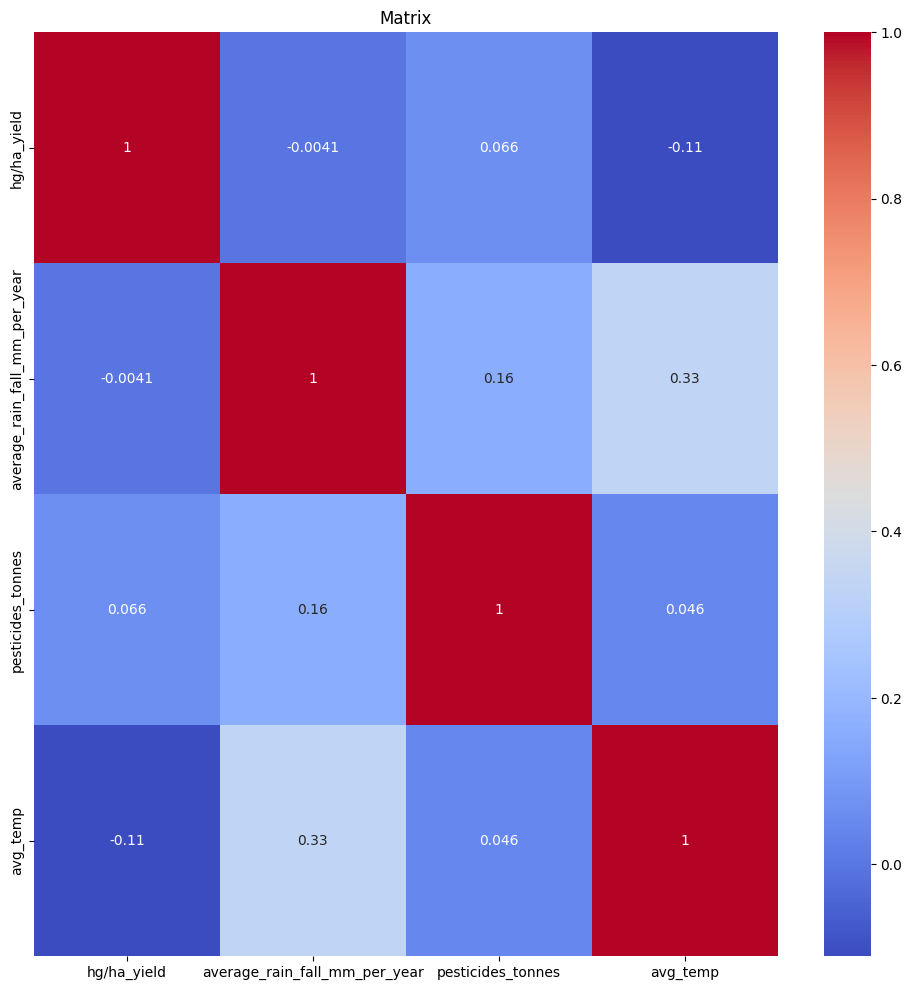

In [27]:
# Creating a heatmap to see the correlation
corr_matrix = df_numerical.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix')
plt.show()

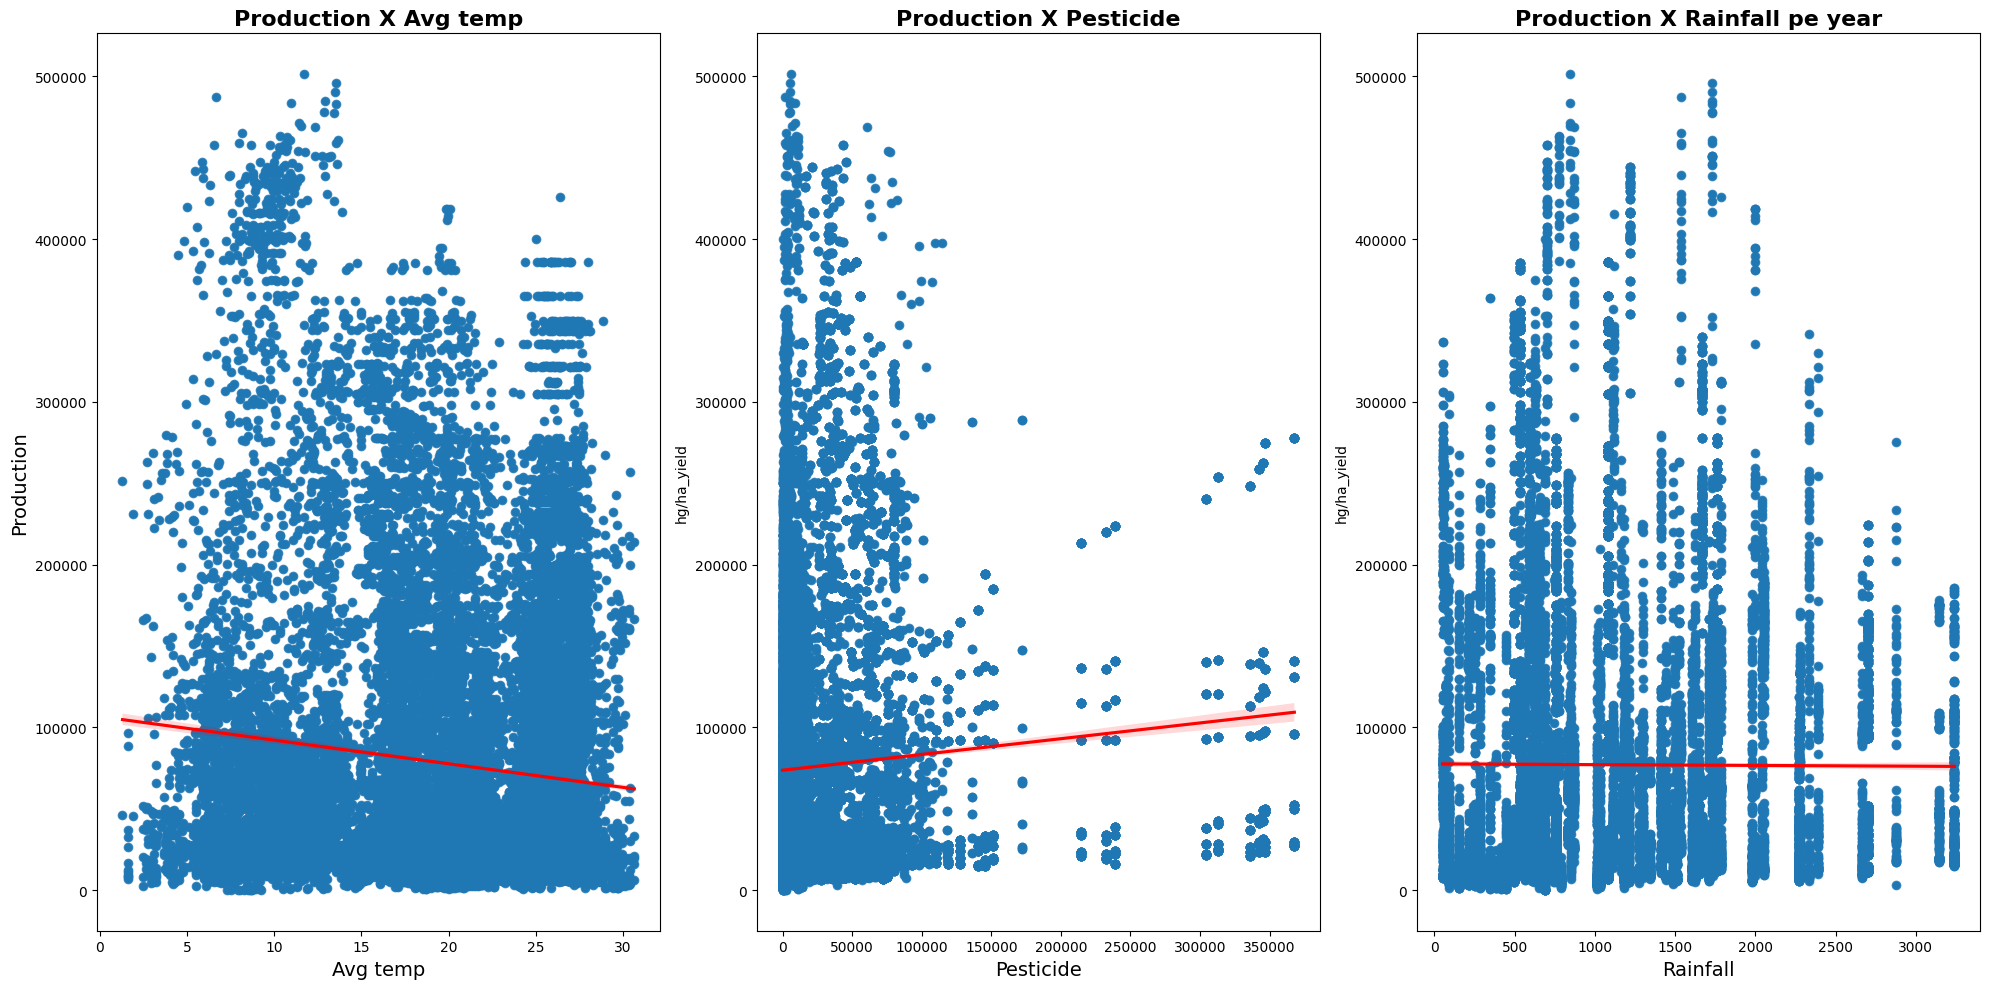

In [42]:
# Creating Scatterplots to checks 
plt.figure(figsize=(20,10))

# Scatter 'hg/ha_yield' X 'avg_temp'
plt.subplot(1,3,1)
sns.scatterplot(x='avg_temp', y='hg/ha_yield', data=df)
plt.title('Production X Avg temp', fontsize=16, fontweight='bold')
sns.regplot(x='avg_temp', y='hg/ha_yield', data=df, line_kws={'color': 'red'})
plt.xlabel('Avg temp', fontsize=14)
plt.ylabel('Production', fontsize=14)

# Scatter 'hg/ha_yield' X 'pesticides_tonnes'
plt.subplot(1,3,2)
sns.scatterplot(x='pesticides_tonnes', y='hg/ha_yield', data=df)
plt.title('Production X Pesticide', fontsize=16, fontweight='bold')
sns.regplot(x='pesticides_tonnes', y='hg/ha_yield', data=df, line_kws={'color': 'red'})
plt.xlabel('Pesticide', fontsize=14)

# Scatter 'hg/ha_yield' X 'average_rain_fall_mm_per_year'
plt.subplot(1,3,3)
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=df)
plt.title('Production X Rainfall pe year', fontsize=16, fontweight='bold')
sns.regplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=df, line_kws={'color': 'red'})
plt.xlabel('Rainfall', fontsize=14)

plt.tight_layout()
plt.show()

First, checked if the dataset had any anomalous values, and initially, I didn't find anything strange.

When I got to the analysis of the categorical features, I found some interesting things:
1. The top 4 countries that have more data are the same top 4 with the largest total production;
2. UK and Spain don't appear in the top 10 with most records but appear in the top 10 with the largest total production;
3. The top 10 with the largest production are completely different from those with de best mean ratio to the global mean.

From the above I've drawn following conclusions:
1. The countries that produce more tend to record more data. I believe that these countries are larger exporters and therefore tend to have better systems and collect more data;
2. Countries like India, Brazil and Mexico are larger producers, but countries like UK, Belgium and Denmark are much more efficientin their production.
3. Over the years, global mean has shown to be a bit more stable than the total production, but both have very similar behavior (e.g. significant growth in the early 2000s, probably due to the commodities boom).

Then, I've searched for outliers. After generating the boxplot for the scaled numerical features, I noticed that 'hg/ha_yield', 'pesticides_tonnes' and 'avg_temp' has outliers. To get a better understanding of how many outliers each feature had, I calculated the Z-score to find the number of outliers beyond 3 standard deviations for each feature, and then I calculated their ratio. I found that 'pesticides_tonnes' and 'hg/ha_yield' had more than 2% outliers, and because of that, I decided to keep them.
- analisar as correlações coletiva e individualmente
